In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('./dataset.csv')

<Axes: xlabel='Период_Начало нед', ylabel='KPI данные понедельно АлфаРМ_Продажи, рубли'>

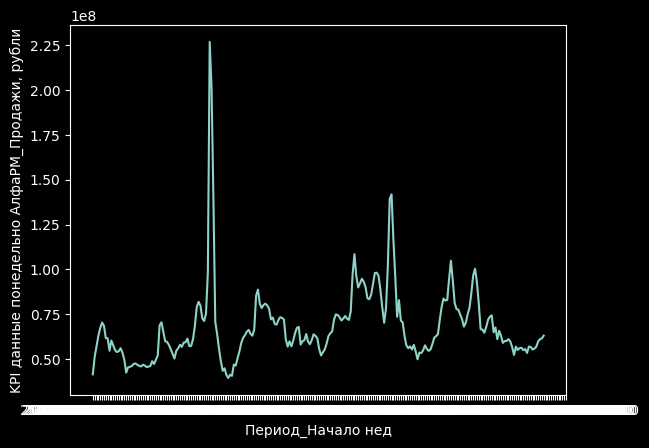

In [5]:
sns.lineplot(data=df, x='Период_Начало нед', y='KPI данные понедельно АлфаРМ_Продажи, рубли')

In [6]:
import statsmodels.api as sm

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()

df['статистика заболеваемости_Статистика заболеваемости'] = scaler.fit_transform(df[['статистика заболеваемости_Статистика заболеваемости']])
df['статистика заболеваемости_Статистика заболеваемости']

0     -0.835837
1     -0.179470
2      0.238837
3      0.667346
4      1.262497
         ...   
309         NaN
310         NaN
311         NaN
312         NaN
313         NaN
Name: статистика заболеваемости_Статистика заболеваемости, Length: 314, dtype: float64

### 

In [9]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
pd.options.display.float_format = '{:.2f}'.format

from itertools import combinations
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARIMA as ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt

In [11]:
df_train_val = df.iloc[:244,:]
df_train_val

,Период_год,Период_неделя,Период_Начало нед,"KPI данные понедельно АлфаРМ_Продажи, рубли","KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки",...,"Медиа (Конкурент 12)_ТВ Рег, рубли",Медиа (Конкурент 12)_Итого,"Медиа (Конкурент 13)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, рубли","Медиа (Конкурент 13)_Диджитал, руб","Медиа (Конкурент 13)_ТВ спонсорство, рубли","Медиа (Конкурент 13)_OOH, рубли","Медиа (Конкурент 13)_Радио, рубли",Медиа (Конкурент 13)_Итого
0,2019,1,2018-12-31 00:00:00,41535567.34,114621.15,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,...,7155663.63,11834254.13,207.90,15.36,9085528.010322582,0.00,0.00,0.00,0.00,9085528.01
1,2019,2,2019-01-07 00:00:00,51222286.23,141523.20,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,...,8348274.24,13996532.16,317.47,25.53,10599782.67870968,0.00,0.00,0.00,0.00,10599782.68
2,2019,3,2019-01-14 00:00:00,57127348.91,157926.30,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,...,8348274.24,11466294.66,192.82,13.91,10599782.67870968,0.00,0.00,0.00,0.00,10599782.68
3,2019,4,2019-01-21 00:00:00,63040990.94,173746.65,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,...,8348274.24,10764632.16,138.37,8.05,10599782.67870968,0.00,0.00,0.00,0.00,10599782.68
4,2019,5,2019-01-28 00:00:00,67336888.87,185551.80,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,...,8477038.25,10984967.91,286.98,24.22,12893092.405548388,0.00,0.00,0.00,0.00,12893092.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023,31,2023-07-31 00:00:00,56931505.06,110088.30,415482902.60,243689995.89,122713435.51,29294571.05,412081.95,...,0.00,NaN,0.00,0.00,0,0.00,0.00,0.00,0.00,NaN
240,2023,32,2023-08-07 00:00:00,59881512.89,115345.65,453475648.10,266831900.02,132395112.53,32654557.10,450227.40,...,0.00,NaN,0.00,0.00,0,0.00,0.00,0.00,0.00,NaN
241,2023,33,2023-08-14 00:00:00,61112178.46,117761.70,453475648.10,266831900.02,132395112.53,32654557.10,450227.40,...,0.00,69394.50,0.00,0.00,0,0.00,0.00,0.00,0.00,NaN
242,2023,34,2023-08-21 00:00:00,61594925.03,118356.00,453475648.10,266831900.02,132395112.53,32654557.10,450227.40,...,0.00,78529.50,0.00,0.00,0,0.00,0.00,0.00,0.00,NaN


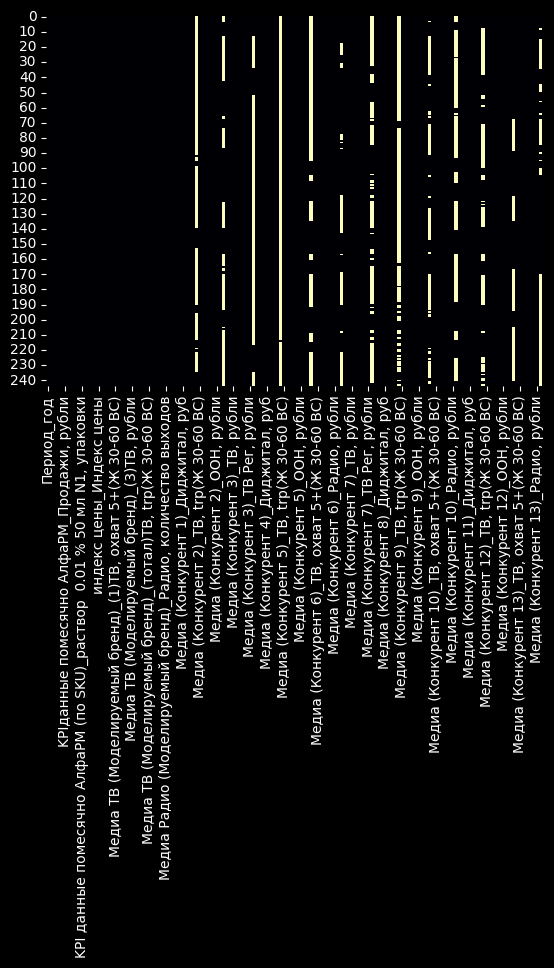

In [12]:
sns.heatmap(df_train_val.isnull(),cmap = 'magma',cbar = False);

In [13]:
df_train_val['Месяц'] = pd.DatetimeIndex(pd.to_datetime(df_train_val['Период_Начало нед'])).month
df_train_val['День'] = pd.DatetimeIndex(pd.to_datetime(df_train_val['Период_Начало нед'])).day

/tmp/ipykernel_580772/982359196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_val['Месяц'] = pd.DatetimeIndex(pd.to_datetime(df_train_val['Период_Начало нед'])).month
/tmp/ipykernel_580772/982359196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_val['День'] = pd.DatetimeIndex(pd.to_datetime(df_train_val['Период_Начало нед'])).day


In [14]:
df_train_val = df_train_val.drop(columns = ['Период_Начало нед'])

In [15]:
df_train_val

,Период_год,Период_неделя,"KPI данные понедельно АлфаРМ_Продажи, рубли","KPI данные понедельно АлфаРМ_Продажи, упаковки","KPIданные помесячно АлфаРМ_Продажи, рубли","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 500 мл N1, руб","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 150 мл N1, упаковки","KPI данные помесячно АлфаРМ (по SKU)_раствор 0.01 % 50 мл N1, упаковки",...,"Медиа (Конкурент 13)_ТВ, trp(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, охват 5+(Ж 30-60 ВС)","Медиа (Конкурент 13)_ТВ, рубли","Медиа (Конкурент 13)_Диджитал, руб","Медиа (Конкурент 13)_ТВ спонсорство, рубли","Медиа (Конкурент 13)_OOH, рубли","Медиа (Конкурент 13)_Радио, рубли",Медиа (Конкурент 13)_Итого,Месяц,День
0,2019,1,41535567.34,114621.15,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,461401.50,...,207.90,15.36,9085528.010322582,0.00,0.00,0.00,0.00,9085528.01,12,31
1,2019,2,51222286.23,141523.20,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,461401.50,...,317.47,25.53,10599782.67870968,0.00,0.00,0.00,0.00,10599782.68,1,7
2,2019,3,57127348.91,157926.30,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,461401.50,...,192.82,13.91,10599782.67870968,0.00,0.00,0.00,0.00,10599782.68,1,14
3,2019,4,63040990.94,173746.65,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,461401.50,...,138.37,8.05,10599782.67870968,0.00,0.00,0.00,0.00,10599782.68,1,21
4,2019,5,67336888.87,185551.80,533280434.80,357119029.90,131122625.41,19644473.04,886424.70,461401.50,...,286.98,24.22,12893092.405548388,0.00,0.00,0.00,0.00,12893092.41,1,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,2023,31,56931505.06,110088.30,415482902.60,243689995.89,122713435.51,29294571.05,412081.95,318306.45,...,0.00,0.00,0,0.00,0.00,0.00,0.00,NaN,7,31
240,2023,32,59881512.89,115345.65,453475648.10,266831900.02,132395112.53,32654557.10,450227.40,340625.25,...,0.00,0.00,0,0.00,0.00,0.00,0.00,NaN,8,7
241,2023,33,61112178.46,117761.70,453475648.10,266831900.02,132395112.53,32654557.10,450227.40,340625.25,...,0.00,0.00,0,0.00,0.00,0.00,0.00,NaN,8,14
242,2023,34,61594925.03,118356.00,453475648.10,266831900.02,132395112.53,32654557.10,450227.40,340625.25,...,0.00,0.00,0,0.00,0.00,0.00,0.00,NaN,8,21


In [16]:
def test_stationarity(timeseries):
    #Determing rolling statistics
    MA = timeseries.rolling(window=12).mean()
    MSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    plt.figure(figsize=(15,5))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(MA, color='red', label='Rolling Mean')
    std = plt.plot(MSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

In [17]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

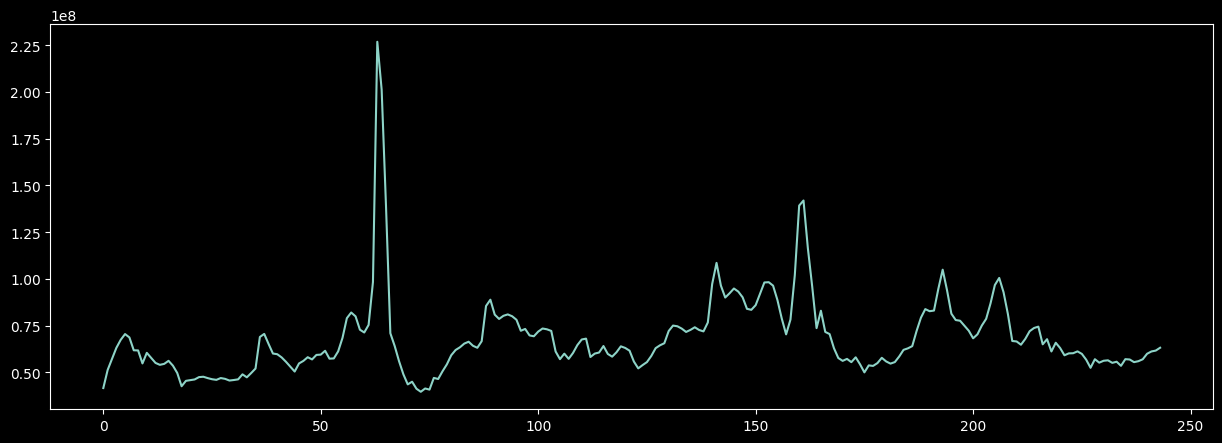

In [18]:
plt.figure(figsize = (15,5))
df_train_val['KPI данные понедельно АлфаРМ_Продажи, рубли'].plot();

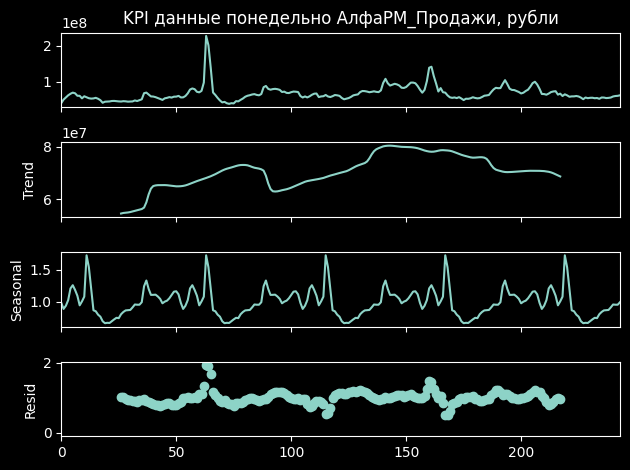

In [19]:
dec = sm.tsa.seasonal_decompose(df_train_val['KPI данные понедельно АлфаРМ_Продажи, рубли'],period = 52, model = 'multiplicative').plot()
plt.show()

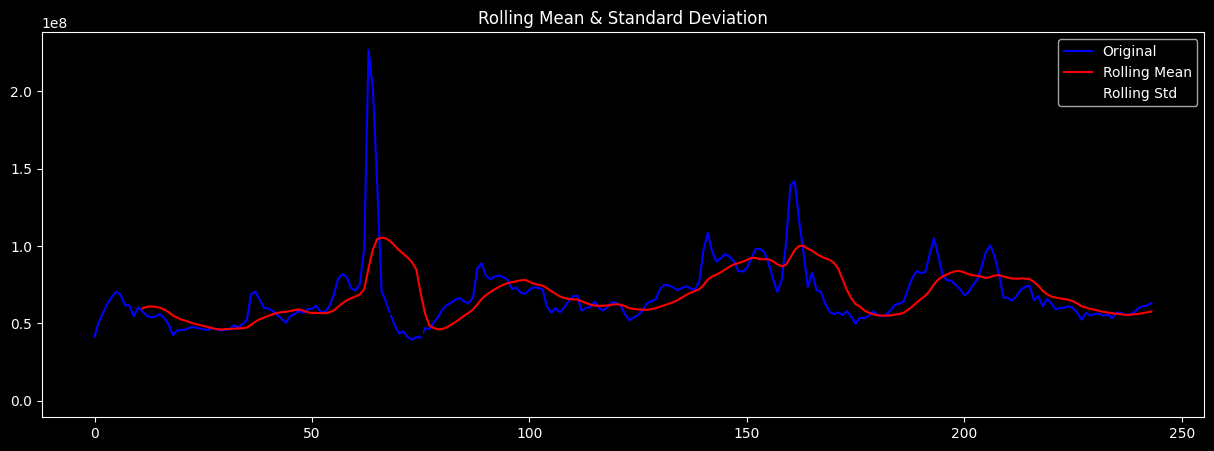

Results of Dickey-Fuller Test:
Test Statistic                 -4.19
p-value                         0.00
#Lags Used                      3.00
Number of Observations Used   240.00
Critical Value (1%)            -3.46
Critical Value (5%)            -2.87
Critical Value (10%)           -2.57
dtype: float64


In [20]:
test_stationarity(df_train_val['KPI данные понедельно АлфаРМ_Продажи, рубли'])

In [68]:
threshold = 244
train = int(threshold * 0.3)

In [69]:
import numpy as np
df = pd.read_csv('./dataset.csv')
df.replace(' ', pd.NA, inplace=True)

df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))

numeric_columns = df.select_dtypes(include=['number'])

column_means = numeric_columns.mean()

df[numeric_columns.columns] = df[numeric_columns.columns].fillna(column_means)

col = [column for column in df.select_dtypes(include=['number']) if ('руб' in column.lower()) or ('итого' in column.lower())]
df[col] = df[col] / 10**8

col = [column for column in df.columns if 'конкурент' not in column.lower()]
new_df = df[col]
X, y = new_df.drop(columns=['KPI данные понедельно АлфаРМ_Продажи, рубли']), new_df['KPI данные понедельно АлфаРМ_Продажи, рубли']
X = X[X.columns[3:]]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_scaled = pd.DataFrame(ss.fit_transform(X), columns=X.columns)

train_X, train_y  = df_scaled[:train], y[:train]
test_X, test_y = df_scaled[train:], y[train:]
train_X['target'] = train_y
test_X['target'] = test_y

/tmp/ipykernel_90257/1871596717.py:5: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df = df.apply(lambda x: pd.to_numeric(x, errors='ignore'))
/tmp/ipykernel_90257/1871596717.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_X['target'] = train_y
/tmp/ipykernel_90257/1871596717.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X['target'] = test_y


In [114]:
import statsmodels as sm


model = sm.tsa.arima.model.ARIMA(np.asarray(train_X['target']), order=(1,1,2))

model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   73
Model:                 ARIMA(1, 1, 2)   Log Likelihood                  22.820
Date:                Sun, 14 Apr 2024   AIC                            -37.640
Time:                        03:17:45   BIC                            -28.533
Sample:                             0   HQIC                           -34.015
                                 - 73                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6775      0.234      2.899      0.004       0.219       1.136
ma.L1         -0.6176      0.307     -2.010      0.044      -1.220      -0.015
ma.L2         -0.3670      0.189     -1.944      0.0

In [122]:
train, test = train_X['target'][:], test_X['target'][:171]

history = [x for x in train]
predictions = []

for t in range(len(test)):
    
    model = sm.tsa.arima.model.ARIMA(history, order=(1,1,2))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(float(yhat))
    
    obs = test.iloc[t]
    history.append(obs)
    
    print('predicted = %f, expected = %f' % (yhat, obs))

predicted = 0.446876, expected = 0.395307
predicted = 0.445267, expected = 0.413001
predicted = 0.462379, expected = 0.406870
predicted = 0.448229, expected = 0.469591
predicted = 0.519719, expected = 0.463716
predicted = 0.486461, expected = 0.505219
predicted = 0.542469, expected = 0.542227
predicted = 0.560996, expected = 0.590787
predicted = 0.605760, expected = 0.618836
predicted = 0.619169, expected = 0.633437
predicted = 0.629815, expected = 0.653281
predicted = 0.647123, expected = 0.663204


/home/user/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.651474, expected = 0.641457
predicted = 0.626896, expected = 0.630848
predicted = 0.624817, expected = 0.666030
predicted = 0.663117, expected = 0.854484
predicted = 0.850702, expected = 0.888212
predicted = 0.818707, expected = 0.808376
predicted = 0.745911, expected = 0.785212
predicted = 0.749331, expected = 0.802008
predicted = 0.768108, expected = 0.809442
predicted = 0.771144, expected = 0.799698
predicted = 0.761191, expected = 0.780712
predicted = 0.745778, expected = 0.721855
predicted = 0.688130, expected = 0.731678
predicted = 0.721081, expected = 0.697000
predicted = 0.671549, expected = 0.692471
predicted = 0.685334, expected = 0.717480
predicted = 0.708021, expected = 0.734030
predicted = 0.718360, expected = 0.729764
predicted = 0.710581, expected = 0.721059
predicted = 0.704609, expected = 0.610885
predicted = 0.586553, expected = 0.569984
predicted = 0.584874, expected = 0.599366
predicted = 0.616816, expected = 0.571452
predicted = 0.573619, expected = 0

/home/user/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.717568, expected = 0.749699
predicted = 0.724510, expected = 0.745928


/home/user/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.718218, expected = 0.733464


/home/user/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.707507, expected = 0.715552


/home/user/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.692549, expected = 0.726502
predicted = 0.710048, expected = 0.740639


/home/user/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.718941, expected = 0.725990
predicted = 0.700186, expected = 0.718576


/home/user/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.699427, expected = 0.766211
predicted = 0.751456, expected = 0.972278


/home/user/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.957916, expected = 1.085415
predicted = 1.008889, expected = 0.963928
predicted = 0.859064, expected = 0.899790
predicted = 0.847151, expected = 0.922609
predicted = 0.879170, expected = 0.948101
predicted = 0.897900, expected = 0.931682
predicted = 0.875256, expected = 0.901054
predicted = 0.852075, expected = 0.839358
predicted = 0.794076, expected = 0.834068
predicted = 0.811227, expected = 0.859151
predicted = 0.833997, expected = 0.919298
predicted = 0.894051, expected = 0.980412
predicted = 0.942081, expected = 0.981966
predicted = 0.928687, expected = 0.963501
predicted = 0.915881, expected = 0.886750
predicted = 0.836994, expected = 0.787323
predicted = 0.756589, expected = 0.702737
predicted = 0.692370, expected = 0.781864
predicted = 0.804785, expected = 1.020057
predicted = 1.029942, expected = 1.391932
predicted = 1.373312, expected = 1.419251
predicted = 1.280442, expected = 1.164235
predicted = 1.029543, expected = 0.958464
predicted = 0.895786, expected = 0

/home/user/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 0.939495, expected = 1.048875
predicted = 1.009632, expected = 0.938959
predicted = 0.858681, expected = 0.813291
predicted = 0.774359, expected = 0.779301
predicted = 0.768531, expected = 0.775643
predicted = 0.766853, expected = 0.748863
predicted = 0.737182, expected = 0.722003
predicted = 0.718101, expected = 0.681509
predicted = 0.679223, expected = 0.703000
predicted = 0.718498, expected = 0.749760
predicted = 0.756481, expected = 0.785905
predicted = 0.783090, expected = 0.868355
predicted = 0.867066, expected = 0.966784
predicted = 0.947761, expected = 1.004678
predicted = 0.961297, expected = 0.927931
predicted = 0.869557, expected = 0.810862
predicted = 0.772105, expected = 0.667150
predicted = 0.645822, expected = 0.664669
predicted = 0.691912, expected = 0.647189
predicted = 0.653454, expected = 0.678608
predicted = 0.703858, expected = 0.719599
predicted = 0.730774, expected = 0.736623
predicted = 0.739631, expected = 0.743998
predicted = 0.744576, expected = 0

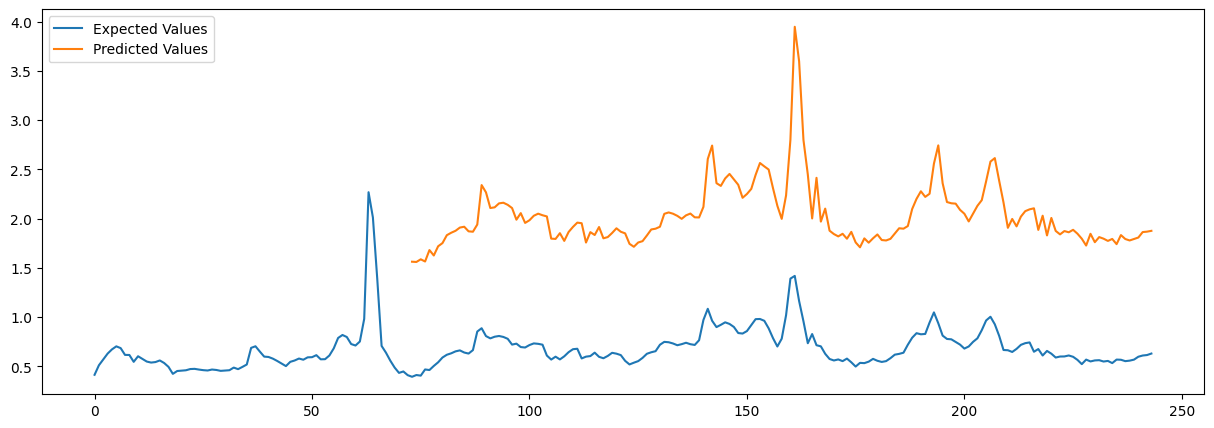

In [127]:
predictions_series = pd.Series(predictions, index = test.index)
fig,ax = plt.subplots(nrows = 1,ncols = 1,figsize = (15,5))

plt.subplot(1,1,1)
plt.plot(pd.concat([train, test], ignore_index=True), label = 'Expected Values')
plt.plot(np.exp(predictions_series),label = 'Predicted Values');
plt.legend(loc="upper left")
plt.show()

In [87]:
!pip install sktime[all_extras]

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.7/251.7 KB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.8/121.8 KB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 KB 6.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
Discarding https://files.pythonhosted.org/packages/f4/7f/e0083a771ecefe10a0fd7b37d9be15adceec16648ed1a81625ade312d23c/pycatch22-0.4.2.tar.gz#sha256=162bd9774a326993c564120221e779fb6e578139e9fb73ed6066a3137e61c3ad (from https://pypi.org/simple/pycatch22/): Requested unknown from https://files.pythonhosted.org/packages/f4/7f/e0083a771ecefe10a0fd7b37d9be15adceec16648ed1a81625ade312d23c/pycatch22-0.4.2.tar.gz#sha

In [88]:
import pandas as pd
from sktime.transformations.series.adapters import SeriesToPanelAdapter
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.scale import MinMaxScaler
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.compose import ForecastingPipeline
from sktime.forecasting.theta import ThetaForecaster
from sktime.datasets import load_airline
from sktime.transformations.panel.compose import TimeSeriesTransformerModel

# Load your own dataset
# df = pd.read_csv('your_dataset.csv', index_col='date_column', parse_dates=True)

# For this example, we use the airline dataset
df = load_airline()

# Define the transformer model
transformer = TimeSeriesTransformerModel(
    steps=[
        ('adapter', SeriesToPanelAdapter()),
        ('detrender', Detrender()),
        ('scaler', MinMaxScaler())
    ]
)

# Define the forecaster
forecaster = ThetaForecaster()

# Define the pipeline
pipeline = ForecastingPipeline(
    steps=[
        ('transformer', transformer),
        ('forecaster', forecaster)
    ]
)

# Split the data into train and test sets
y_train, y_test = temporal_train_test_split(df)

# Fit the pipeline to the training data
pipeline.fit(y_train)

# Make predictions on the test data
y_pred = pipeline.predict(fh=y_test.index)


ModuleNotFoundError: No module named 'sktime.transformations.series.adapters'